In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Reviews.csv',nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [4]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [6]:
!pip install textblob

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text']=df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]',' ')

stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text']=df['Text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\w'
/var/folders/6g/fbpq5f055g72m2p_0rlgrxtm0000gn/T/ipykernel_1521/42629703.py:10: SyntaxWarning: invalid escape sequence '\w'
  df['Text']=df['Text'].str.replace('[^\w\s]',' ')
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karthikreddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

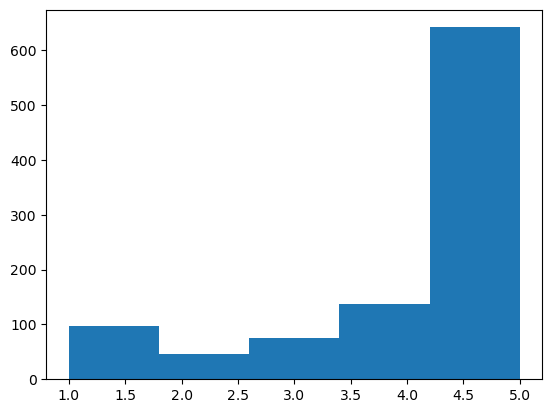

Score
1     98
2     47
3     75
4    138
5    642
Name: Id, dtype: int64


In [15]:
reviews = df

# Dropping null values
reviews.dropna(inplace=True)

# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [30]:
score_1=reviews[reviews['Score']==1].sample(n=47)
score_2=reviews[reviews['Score']==2].sample(n=47)
score_3=reviews[reviews['Score']==3].sample(n=47)
score_4=reviews[reviews['Score']==4].sample(n=47)
score_5=reviews[reviews['Score']==5].sample(n=47)

In [32]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

print(reviews_sample.groupby('Score').count().Id)

Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


In [19]:
!pip install wordcloud

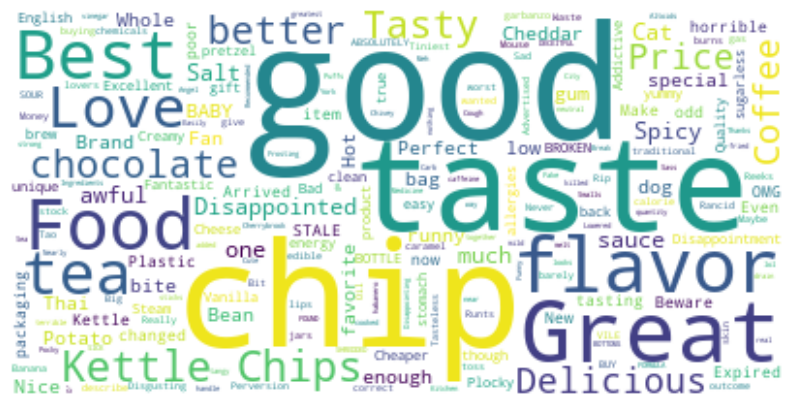

In [34]:
from wordcloud import WordCloud
reviews_str=" ".join(reviews_sample["Summary"].to_numpy())

wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5]) ]

negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()

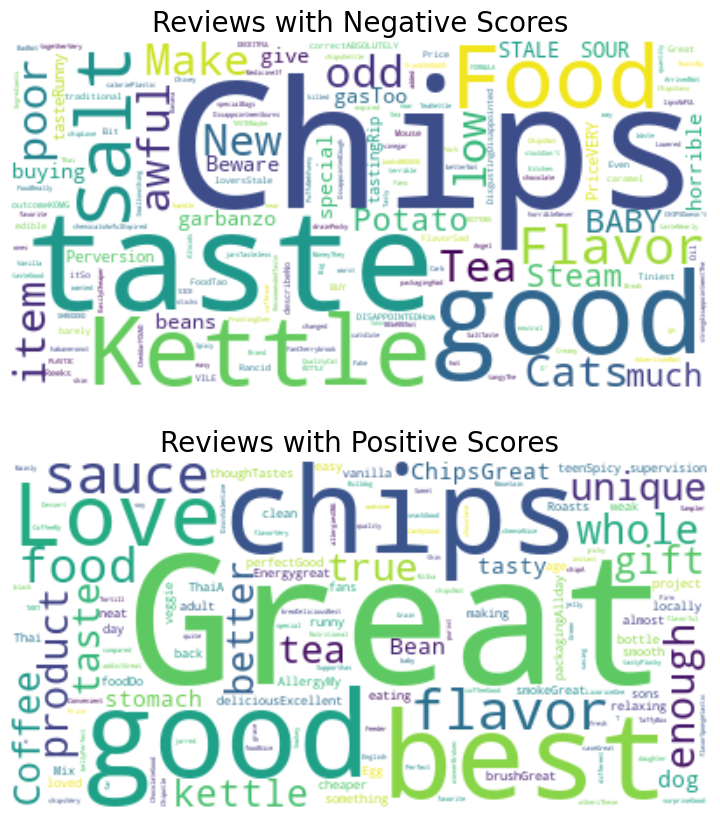

In [40]:
#Create wordclouds
wordcloud_negative=WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_reviews_str)

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2=fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

# vaderSentiment

In [42]:
!pip install vaderSentiment

In [45]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')

cp=sns.color_palette()

analyzer=SentimentIntensityAnalyzer()

emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [47]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.123,0.608,0.268,0.8532
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468
